In [1]:
# Import Libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd


In [118]:
url = "https://paperswithcode.com/methods"
response = requests.get(url)

In [5]:
# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <script>
   const GTAG_ENABLED =  true ;
    const GTAG_TRACKING_ID = "UA-121182717-1";
    const SENTRY_DSN_FRONTEND = "".trim();
    const GLOBAL_CSRF_TOKEN = 'uK3L7Hs588BgMc6DNHUhfwzISb888TbuHJRf6lhigyX1IrBCljUvwSQmMtvoTjzH';
    const MEDIA_URL = "https://production-media.paperswithcode.com/";
    const ASSETS_URL = "https://production-assets.paperswithcode.com";
    run_after_frontend_loaded = window.run_after_frontend_loaded || [];
  </script>
  <link href="https://production-assets.paperswithcode.com" rel="preconnect"/>
  <link href="https://production-assets.paperswithcode.com" rel="dns-prefetch"/>
  <link as="font" crossorigin="" href="https://production-assets.paperswithcode.com/perf/fonts/65e877e527022735c1a1.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="https://production-assets.paper
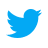
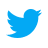
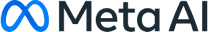

In [28]:
pretty_html = soup.prettify()
print(pretty_html)

In [41]:
all_data = soup.find('div', class_='infinite-container featured-methods')

In [45]:
extracted_info = []

In [43]:
# Loop over each sub-div of "row task-group-title"
for group in all_data.find_all('div', class_='row task-group-title'):
    topic_name = group.find('h4').text.strip()
    extracted_info.append({'topic_name': topic_name})

    all_data
        General
            Attention
                126 methods
                40333 papers with code
            Attention Mechanisms
            .
            .
        Computer Vision
            CNN
                124 methods

In [170]:
def get_topic_method_info(topic_name, card, methods_list):
    topic_link = "https://paperswithcode.com" + card.find('a')['href']
    topic_response = requests.get(topic_link)
    topic_soup = BeautifulSoup(topic_response.content, 'html.parser')
    description = topic_soup.find('div', class_='description-content')
    description = description.text.strip() if description else None

    method_content_div = topic_soup.find('div', class_='method-content')
    table = method_content_div.find('table')
    # head = table.find('thead')
    # head.find_all('th')

    rows = table.find('tbody').find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        method_name, paper = cols[0].split('\n\n\n', 1) if '\n\n\n' in cols[0] else (cols[0], None)
        methods_list.append({
            'topic_name': topic_name,
            'method': method_name.strip(),
            'num_papers': cols[2],
            'paper_name': paper,
            'year': cols[1],
        })
    return description

In [172]:
extracted_info = []
methods = []

topic_groups = soup.find_all('div', class_='row task-group-title')

for group in topic_groups:
    ml_field = group.find('h4').text.strip()

    card_deck = group.find_next('div', class_='card-deck card-break infinite-item')
    print("-", ml_field)
    if card_deck:
        for card in card_deck.find_all('div', class_='card'):
            topic_name = card.find('h1').text.strip()  # Get the method name
            print("---", topic_name)
            topic_desc = get_topic_method_info(topic_name, card, methods)
        
            extracted_info.append({
                'topic_name': topic_name,
                'ml_field': ml_field,
                'num_methods': card.find('div', class_='text-muted').find('span').next_sibling.strip().split()[0],
                'num_papers': card.find_all('div', class_='text-muted')[1].text.strip().split()[0],
                # 'topic_description': topic_desc,
                'topic_link': "https://paperswithcode.com" + card.find('a')['href'],
            })
            # break

df = pd.DataFrame(extracted_info)

- General
-- Attention
-- Attention Mechanisms
-- Activation Functions
-- Stochastic Optimization
-- Regularization
- Computer Vision
-- Convolutional Neural Networks
-- Generative Models
-- Image Model Blocks
-- Object Detection Models
-- Image Feature Extractors
- Natural Language Processing
-- Language Models
-- Transformers
-- Word Embeddings
-- Attention Patterns
-- Sentence Embeddings
- Reinforcement Learning
-- Policy Gradient Methods
-- Off-Policy TD Control
-- Reinforcement Learning Frameworks
-- Q-Learning Networks
-- Heuristic Search Algorithms
- Audio
-- Generative Audio Models
-- Audio Model Blocks
-- Text-to-Speech Models
-- Speech Separation Models
-- Speech Recognition
- Sequential
-- Recurrent Neural Networks
-- Sequence To Sequence Models
-- Time Series Analysis
-- Temporal Convolutions
-- Bidirectional Recurrent Neural Networks
- Graphs
-- Graph Models
-- Graph Embeddings
-- Graph Representation Learning
-- Graph Data Augmentation


In [173]:
df.head()

,topic_name,ml_field,num_methods,num_papers,topic_link
0,Attention,General,126,40333,https://paperswithcode.com/methods/category/at...
1,Attention Mechanisms,General,82,22233,https://paperswithcode.com/methods/category/at...
2,Activation Functions,General,75,34765,https://paperswithcode.com/methods/category/ac...
3,Stochastic Optimization,General,71,24047,https://paperswithcode.com/methods/category/st...
4,Regularization,General,58,54263,https://paperswithcode.com/methods/category/re...


In [174]:
len(df)

34

In [175]:
df_methods = pd.DataFrame(methods)
df_methods.head()

,topic_name,method,num_papers,paper_name,year
0,Attention,Scaled Dot-Product Attention,19790,Attention Is All You Need,2017
1,Attention,Multi-Head Attention,19709,Attention Is All You Need,2017
2,Attention,Strided Attention,1594,Generating Long Sequences with Sparse Transfo...,2019
3,Attention,Fixed Factorized Attention,1593,Generating Long Sequences with Sparse Transfo...,2019
4,Attention,RAN,283,Residual Attention Network for Image Classifi...,2017


In [176]:
len(df_methods)

1379

Domain | Task | Subtask | Dataset | BestModel | Metrics | Score | Year
NLP | Language Modelling | Language Modelling | WikiText-103 | RETRO | Perplexity | 2.4 | 2024

Timeout occurred while loading page 1. Skipping.


KeyboardInterrupt: 